In [88]:
import matplotlib.pyplot as plt
import imp
import numpy as np
import xarray
import tensorflow as tf
import tensorflow.keras.backend as K
import enso
from sklearn.ensemble import RandomForestRegressor

In [271]:
imp.reload(enso);
np.random.seed(0);

In [272]:
def create_ts(length, period):
    t = np.arange(length) + np.random.rand(1)
    noise = np.random.normal(0, 0.2, length)
    return np.cos(2 * np.pi * t / period) + noise + np.cos(np.pi * t / 60)

In [273]:
length = 12 * 500
T = 12
H = 4

In [274]:
sig = np.vstack((create_ts(length, 12), create_ts(length, 12))).T
clm = enso.climatology(sig)
anm = enso.anomaly(sig, clm)
oni = enso.ONI(anm)
oni_norm = enso.normalize(oni)
print(np.mean(oni_norm), np.std(oni_norm))

-4.5593158877939763e-17 0.9999999999999999


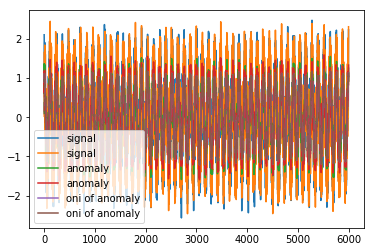

In [275]:
plt.plot(sig, label = "signal");
plt.plot(anm, label = "anomaly");
plt.plot(oni, label = "oni of anomaly");
plt.legend();

In [276]:
input_sig = oni_norm

In [277]:
data = enso.ts2history(input_sig, T, H)

In [278]:
labels = enso.ts2diff(input_sig[:, 0], T, H)

In [279]:
(train_x, test_x) = enso.split(data.reshape(data.shape[0], data.shape[1] * data.shape[2]), 4, 7)
(train_y, test_y) = enso.split(labels, 4, 7)

In [280]:
model = RandomForestRegressor(max_depth = 5, random_state = 0, n_estimators = 100)
model.fit(train_x, train_y);
pred_y = model.predict(test_x)

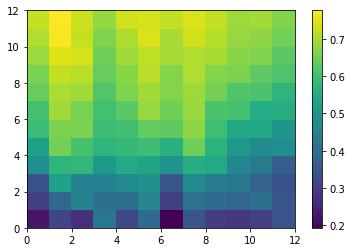

In [281]:
enso.plot_monthly_correlation(pred_y, test_y, T);

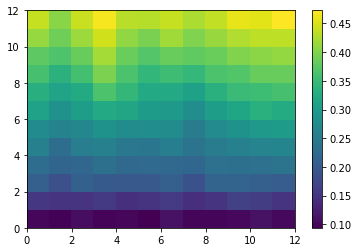

In [282]:
enso.plot_monthly_rmse(pred_y, test_y, T);

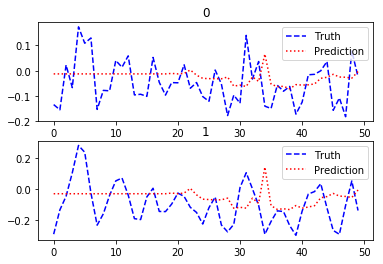

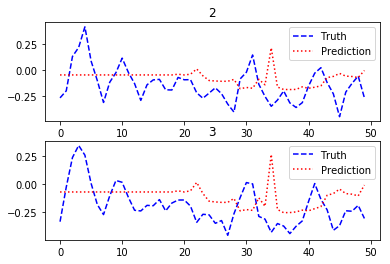

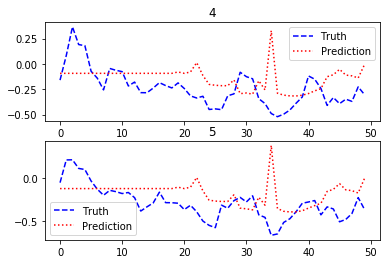

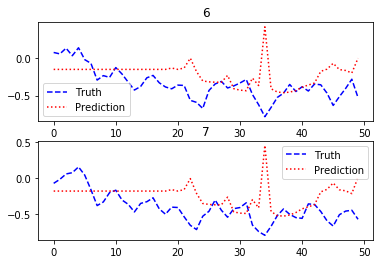

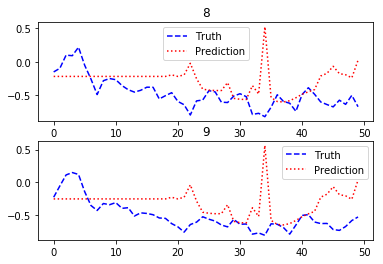

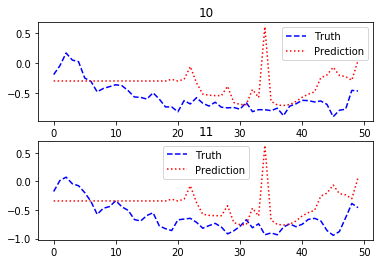

<Figure size 432x288 with 0 Axes>

In [283]:
enso.plot_ts(pred_y, test_y, range(0, 50), T);

In [284]:
(persistance_corr, persistance_rmse) = enso.persistance_corr_rmse(oni_norm[:, 0], T)

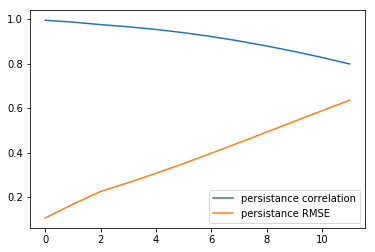

In [285]:
plt.plot(persistance_corr, label = "persistance correlation");
plt.plot(persistance_rmse, label = "persistance RMSE");
plt.legend();